In [117]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import venn
import os 

%matplotlib inline

## pyUpset package for ...

orthofinder_dir_path    = '../Orthofinder-results-plot/apegreffi_corset_contracaecum_corset_asimplex_genome/OrthoFinder/Results_May21'
orthogroups_dir_path    = orthofinder_dir_path + '/Orthogroups'
orthologues_dir_path    = orthofinder_dir_path + '/Orthologues'
genomics_stats_dir_path = orthofinder_dir_path + '/Comparative_Genomics_Statistics'

# Getting the file names
stats_per_species       = genomics_stats_dir_path + '/Statistics_PerSpecies.tsv'
orthogroups_file        = orthogroups_dir_path + '/Orthogroups.tsv'
orthologues_many_many   = genomics_stats_dir_path + '/OrthologuesStats_many-to-many.tsv'
orthologues_many_one    = genomics_stats_dir_path + '/OrthologuesStats_many-to-one.tsv'
orthologues_one_many    = genomics_stats_dir_path + '/OrthologuesStats_one-to-many.tsv'
orthologues_one_one     = genomics_stats_dir_path + '/OrthologuesStats_one-to-one.tsv'

# Getting the organism names
organisms = ! head -n 1 $stats_per_species
organisms = organisms[0].split('\t')[1:]

<AxesSubplot: >

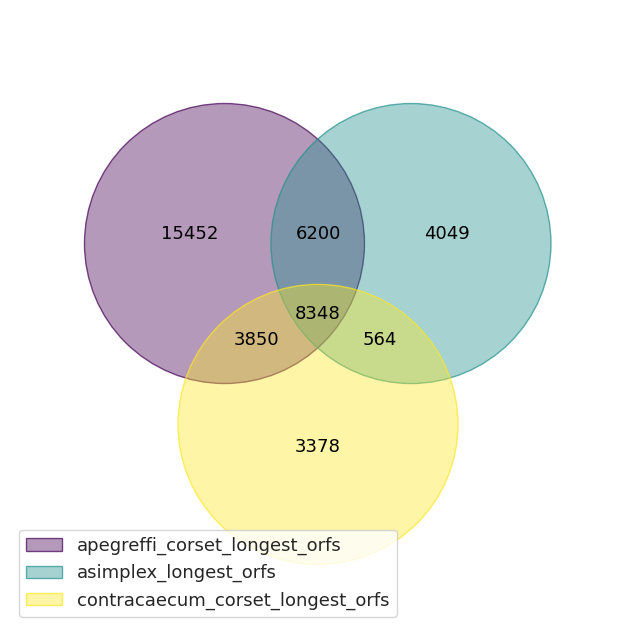

In [127]:
# Take all orthogroups of each organism

df = pd.read_csv(orthogroups_file, sep='\t')

s = {}

for org in organisms:
    s[org] = set(df[df[org].notna()]['Orthogroup'])

venn.venn(s, legend_loc='lower left')

In [119]:
def load_orthologues(path, dic):
    df = pd.read_csv(path, sep='\t', index_col='Unnamed: 0')
    df = df.T.reset_index()

    for org in organisms:
        dic[org].append(df[org].sum())

def get_orthologues_percentage(orthologues):

    tot = sum(orthologues)

    orthologues[0] = round(orthologues[0] / tot *100, 2)

    for i in range(1, len(orthologues)-1):
        orthologues[i] = round(orthologues[i] / tot *100 + orthologues[i-1], 2)
    
    orthologues[-1] = 100.0

    
    return orthologues

In [120]:
orthologues_percentage = {}

for org in organisms:
    orthologues_percentage[org] = []

# many - many
load_orthologues(orthologues_many_many, orthologues_percentage)
load_orthologues(orthologues_many_one,  orthologues_percentage)
load_orthologues(orthologues_one_many,  orthologues_percentage)
load_orthologues(orthologues_one_one,   orthologues_percentage)

for org in organisms:
    orthologues_percentage[org] = get_orthologues_percentage(orthologues_percentage[org])

orthologues_percentage['apegreffi_corset_longest_orfs']

[59.89, 95.12, 98.06, 100.0]

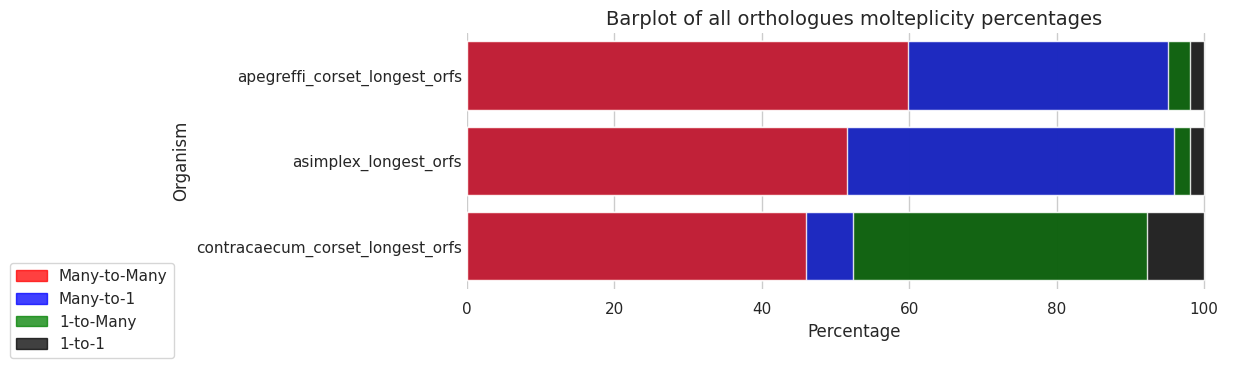

In [121]:
from matplotlib import patches

# Impostazione dello stile di Seaborn
sns.set(style="whitegrid")
colori = ['red', 'blue', 'green', 'black']
molteplicity = ['Many-to-Many', 'Many-to-1', '1-to-Many', '1-to-1']

# Creazione del grafico
fig, ax = plt.subplots(figsize=(15, 4))

# Creazione delle singole barre con colori diversi
for i in range(3, -1, -1):
    sns.barplot(x=[orthologues_percentage[k][i] for k in orthologues_percentage.keys()], color=colori[i], y=organisms, ax=ax, errorbar=None, alpha=0.85)

# Personalizzazione dell'asse x, y e degli spazi dei ticks
ax.set_xlabel('Percentage', fontsize=12)
ax.set_ylabel('Organism', fontsize=12)
ax.set_title('Barplot of all orthologues molteplicity percentages', fontsize=14)

# Rimozione dei bordi del grafico
sns.despine(top=True, right=True, left=True, bottom=True)

# Rimozione dei ticks dell'asse y
ax.tick_params(axis='y', length=0)

# Legenda
patches_list = [patches.Patch(color=colori[i], label=molteplicity[i], alpha=0.75) for i in range(len(molteplicity))]
ax.legend(handles=patches_list, loc='lower left', bbox_to_anchor=(-0.6, -0.3))

plt.tight_layout()
plt.show()

In [71]:
list(range(3, -1, -1))

[3, 2, 1, 0]